In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time
import matplotlib.pyplot as plt
# from sklearn_evaluation import plot

print("Imports complete")

c:\Anaconda3\envs\ml_env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Imports complete


In [ ]:
# Load the data from the text file, ignoring the first line

filename="./data/MiniBooNE_PID.txt"
data=pd.read_csv(filename,delim_whitespace=True,skiprows=1,header=None)
print(data.head(1))
X=data

In [ ]:
""" Create target vector for each row of the dataset. 
The first value in the first row contains the number of signal events, the second the number of background events. 
The target vector should contain 1 for signal events and 0 for background events."""

# Get number of signal and background events
signal, background = open(filename).readline().split()

y = np.concatenate((np.ones(int(signal)), np.zeros(int(background))))
print(y.shape)

Standardization scales the input features to have a mean of 0 and a standard deviation of 1

In [ ]:
# Standardize the input data
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [ ]:
""" save the scaled matrix and the target vector as npy files """
np.save('X.npy', X_scaled)
np.save('y.npy', y)

In [3]:
X=np.load('X.npy') # load the scaled matrix
y=np.load('y.npy')

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create a vanilla neural network classifier and train it on the training data
nn_clf = MLPClassifier(random_state=42)

# Define the hyperparameter space to search over for the vanilla neural network classifier
nn_param_grid = {
    # 'hidden_layer_sizes': [(40,), (40,40), (40,40,40), (40,40,40,40)],
    'hidden_layer_sizes': [(30,), (30,30), (30,30,30), (30,30,30,30)],
    # 'activation': ["relu", "logistic", "tanh", "identity"],
    # 'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500],
    'random_state': [42]
}

# Set up the grid search using 5-fold cross-validation
nn_grid_search = GridSearchCV(nn_clf, nn_param_grid, cv=5, scoring='accuracy',verbose=10)
# nn_grid_search = RandomizedSearchCV(nn_clf, nn_param_grid, cv=5, scoring='accuracy', n_iter=2)

# Perform the grid search on the training set
nn_start_time = time.time()
nn_grid_search.fit(X_train, y_train)
nn_end_time = time.time()
print('Time required to grid search Vanilla Neural Network classifier:', nn_end_time - nn_start_time)

# Print the best hyperparameters and the best cross-validation accuracy
print('Vanilla Neural Network best hyperparameters:', nn_grid_search.best_params_)
print('Vanilla Neural Network best cross-validation accuracy:', nn_grid_search.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START hidden_layer_sizes=(30,), max_iter=500, random_state=42.....


c:\Anaconda3\envs\ml_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


[CV 1/5; 1/4] END hidden_layer_sizes=(30,), max_iter=500, random_state=42;, score=0.927 total time=  38.1s
[CV 2/5; 1/4] START hidden_layer_sizes=(30,), max_iter=500, random_state=42.....


In [ ]:

# Re-train the classifier using the best hyperparameters on the full training set
nn_clf = nn_grid_search.best_estimator_

# nn_start_time = time.time()
# nn_clf.fit(X_train, y_train)
# nn_end_time = time.time()

# Evaluate the classifier on the test set
# nn_test_accuracy = nn_clf.score(X_test, y_test)
nn_test_accuracy = nn_grid_search.score(X_test, y_test)
print('Time required to train Vanilla Neural Network classifier:', nn_end_time - nn_start_time)
print('Vanilla Neural Network test accuracy:', nn_test_accuracy)

In [15]:
""" Plot the scores for the searched parameters on the vanilla neural network classifier """
# plot.grid_search(nn_grid_search.cv_results_, change='hidden_layer_sizes', kind='bar')
pd.DataFrame(nn_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,param_max_iter,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,99.880801,42.922300,0.008834,0.001813,"(10,)",500,42,"{'hidden_layer_sizes': (10,), 'max_iter': 500,...",0.931142,0.930514,0.928496,0.921864,0.923546,0.927113,0.003741,5
1,100.269097,14.807600,0.010706,0.000335,"(20,)",500,42,"{'hidden_layer_sizes': (20,), 'max_iter': 500,...",0.932488,0.930034,0.930226,0.932052,0.931139,0.931188,0.000969,4
2,74.619544,20.569110,0.011496,0.004978,"(30,)",500,42,"{'hidden_layer_sizes': (30,), 'max_iter': 500,...",0.934217,0.934647,0.934695,0.930802,0.930899,0.933052,0.001805,3
3,376.359996,372.444650,0.018623,0.007770,"(40,)",500,42,"{'hidden_layer_sizes': (40,), 'max_iter': 500,...",0.935659,0.937049,0.931860,0.934262,0.936617,0.935090,0.001877,1
4,163.394616,33.058251,0.025206,0.003538,"(50,)",500,42,"{'hidden_layer_sizes': (50,), 'max_iter': 500,...",0.934986,0.930995,0.933494,0.932052,0.937194,0.933744,0.002188,2


In [ ]:
# Get the results of the grid search
results = nn_grid_search.cv_results_

# Get the mean and standard deviation for each hyperparameter combination
mean_scores = results['mean_test_score']
mean_times = results['mean_fit_time']
params = results['param_hidden_layer_sizes']

# Loop through each combination of hyperparameters
for mean_score, mean_time, param in zip(mean_scores, mean_times, params):
    print("HiddenLayerSize: %r [%.2fs] score: %f" % (param, mean_time, mean_score))


HiddenLayerSize: (10,) [99.880801s] score: 0.927113
HiddenLayerSize: (20,) [100.269097s] score: 0.931188
HiddenLayerSize: (30,) [74.619544s] score: 0.933052
HiddenLayerSize: (40,) [376.359996s] score: 0.935090
HiddenLayerSize: (50,) [163.394616s] score: 0.933744


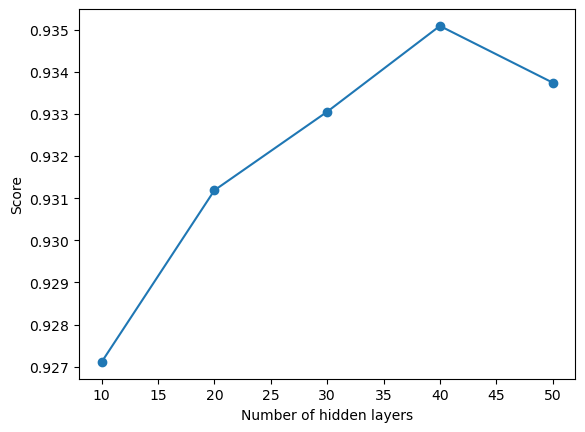

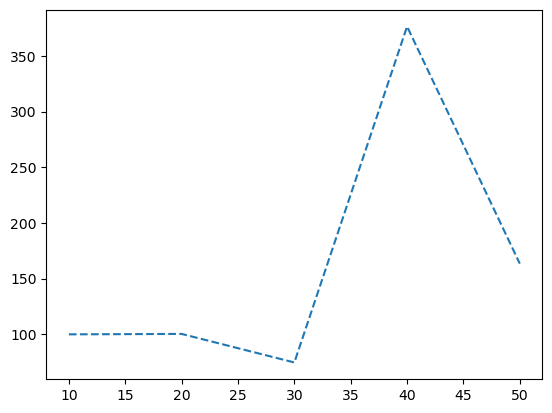

In [42]:
# print(list(params))
# Get the number of hidden layers for each model
# hidden_layer_sizes = [param['hidden_layer_sizes'] for param in params]
# print(type(hidden_layer_sizes))
plt.plot(list(params), mean_scores, 'o-', label="Mean Score")

# Add labels to the axes
plt.xlabel('Number of hidden layers')
plt.ylabel('Score')

# Show the plot
plt.show()

In [ ]:
# Create a SVM classifier and train it on the training data
svm_clf = SVC(random_state=42)

svm_param_grid = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'random_state': [42],
}

svm_grid_search = GridSearchCV(svm_clf, svm_param_grid, cv=5, scoring='accuracy')

svm_start_time = time.time()
svm_grid_search.fit(X_train, y_train)
svm_end_time = time.time()

print('SVM best hyperparameters:', svm_grid_search.best_params_)
print('SVM best cross-validation accuracy:', svm_grid_search.best_score_)

svm_clf = svm_grid_search.best_estimator_

# svm_clf.fit(X_train, y_train)

svm_test_accuracy = svm_grid_search.score(X_test, y_test)
print('Time required to train SVM classifier:', svm_end_time - svm_start_time)
print('SVM test accuracy:', svm_test_accuracy)

In [ ]:
# Create a random forest classifier and train it on the training data
rf_clf = RandomForestClassifier(random_state=42)

param_grid = {
    "n_estimators": [10, 50, 100, 200],
    # "max_depth": [None, 10, 20, 30],
    # "min_samples_split": [2, 4, 8],
    # "min_samples_leaf": [1, 2, 4],
    # "max_features": ["sqrt", "log2", None]
    'random_state': [42]
}

rf_grid_search = GridSearchCV(rf_clf, svm_param_grid, cv=5, scoring='accuracy')

rf_start_time = time.time()
rf_grid_search.fit(X_train, y_train)
rf_end_time = time.time()

print('RF best hyperparameters:', rf_grid_search.best_params_)
print('RF best cross-validation accuracy:', rf_grid_search.best_score_)

rf_clf = rf_grid_search.best_estimator_
# rf_clf.fit(X_train, y_train)

rf_test_accuracy = rf_grid_search.score(X_test, y_test)
print('Time required to train RF classifier:', rf_end_time - rf_start_time)
print('RF test accuracy:', rf_test_accuracy)

In [ ]:
# Generate predictions for the test set
nn_predictions = nn_clf.predict(X_test)
svm_predictions = svm_clf.predict(X_test)
rf_predictions = rf_clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

# Define a dictionary that maps model names to their hyperparameters
model_hyperparams = {
    'Vanilla Neural Network': nn_grid_search.best_params_,
    'SVM': svm_grid_search.best_params_,
    'Random Forest': rf_grid_search.best_params_
}

# Compute the confusion matrix for each model
nn_confusion_matrix = metrics.confusion_matrix(y_test, nn_predictions)
svm_confusion_matrix = metrics.confusion_matrix(y_test, svm_predictions)
rf_confusion_matrix = metrics.confusion_matrix(y_test, rf_predictions)

# Print the confusion matrix and hyperparameters for each model
print('Vanilla Neural Network confusion matrix:')
print(nn_confusion_matrix)
print('Vanilla Neural Network hyperparameters:', model_hyperparams['Vanilla Neural Network'])

print('SVM confusion matrix:')
print(svm_confusion_matrix)
print('SVM hyperparameters:', model_hyperparams['SVM'])

print('Random Forest confusion matrix:')
print(rf_confusion_matrix)
print('Random Forest hyperparameters:', model_hyperparams['Random Forest'])

In [ ]:
# Evaluate the performance of each classifier
nn_accuracy = metrics.accuracy_score(y_test, nn_predictions)
svm_accuracy = metrics.accuracy_score(y_test, svm_predictions)
rf_accuracy = metrics.accuracy_score(y_test, rf_predictions)
print("Vanilla Neural Network Accuracy:", nn_accuracy)
print("SVM Accuracy:", svm_accuracy)
print("Random Forest Accuracy:", rf_accuracy)